In [1]:
from gradient_descent import GradientDescent
import numpy as np

In [140]:
class DichotomyScheduler:
    def __init__(self, f, max_lr=1, iters=10, delta=1e-2):
        self.f = f
        self.max_lr = max_lr
        self.iters = iters
        self.delta = delta
        
    def _dichotomy(self, f, a, b):
        if not 0 < 2 * self.delta < (b - a):
            raise RuntimeError("`delta` should be in [0, (a + b) / 2]")
        for iter in range(self.iters):
            x1 = (a + b) / 2 - self.delta
            x2 = (a + b) / 2 + self.delta
            if f(x1) > f(x2):
                a = x1
            else:
                b = x2
            if b - a < 2 * self.delta:
                break
        return (a + b) / 2

    def step(self, point, gradient):
        return self._dichotomy(lambda lr: self.f(point - lr * gradient), 0, self.max_lr)


In [172]:
fs = [lambda x: x ** 2, lambda x: np.sin(x) / x, lambda x: 0.001 * x ** 3 + 0.01 * x ** 2]
f_grads = [lambda x: x * 2, lambda x: (np.cos(x) * x - np.sin(x)) / x ** 2, lambda x: 0.003 * x ** 2 + 0.02 * x]
f_names = ['x ^ 2', 'sin(x) / x', 'x^3-10x^2+x']
initial_points = [10, 0.1, 10]

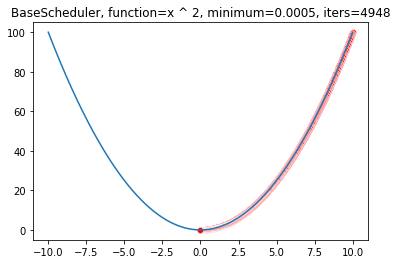

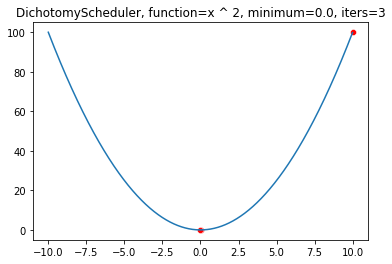

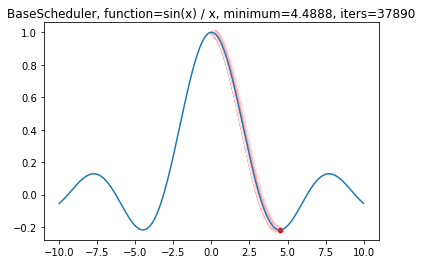

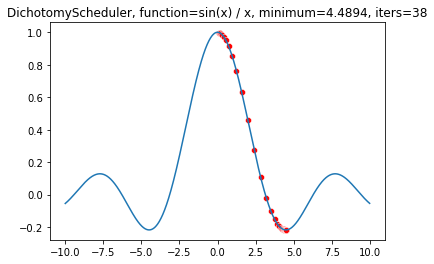

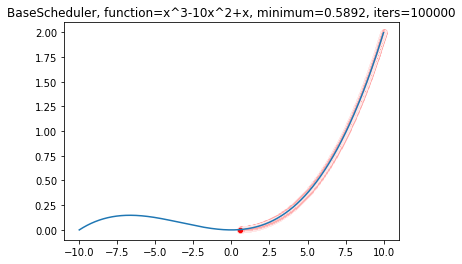

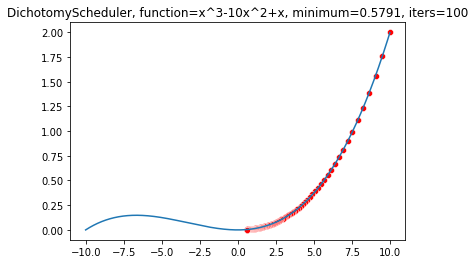

In [173]:
for f, f_grad, initial_point, f_name in zip(fs, f_grads, initial_points, f_names):
    base_gd = GradientDescent(function=f, derivative=f_grad, iterations=100000, epsilon=1e-6, initial_point=np.array([initial_point]))
    base_answer, base_iterations_count = base_gd.optimize()
    base_gd.plot_trace(with_function=True, from_x=-10, to_x=10, title=f'BaseScheduler, function={f_name}, minimum={round(base_answer[0], 4)}, iters={base_iterations_count}')

    scheduler = DichotomyScheduler(f, iters=10)
    dichotomy_gd = GradientDescent(function=f, derivative=f_grad, scheduler=scheduler, iterations=100, initial_point=np.array([initial_point]))
    dichotomy_answer, dichotomy_iterations_count = dichotomy_gd.optimize()
    dichotomy_gd.plot_trace(with_function=True, from_x=-10, to_x=10, title=f'DichotomyScheduler, function={f_name}, minimum={round(dichotomy_answer[0], 4)}, iters={dichotomy_iterations_count}')

В базовой реализации градиентного спуска с константным learning rate количество вызовов функции градиента совпадает с количеством итераций градиентного спуска. В реализации с использованием метода дихотомии на каждом шаге кроме вычисления функции градиента еще в худшем случае O(число итераций метода дихотомии) раз вызывается сама функция. Из графиков видим, что для сходимости градиентного спуска с помощью дихотомии требуется на 3 порядка меньше итераций, а сама дихотомия запускается в данной реализации всего лишь 10 раз, так что получаем, что градиентный спуск с дихотомией работает как м инимум в 100 раз эффективнее, чем стандартный с точки зрения вычислений минимизируемой функции и ее градиентов.